# PCA

## Introducción

El **Análisis de Componentes Principales (PCA, por sus siglas en inglés)** es una técnica de reducción de dimensionalidad que busca transformar un conjunto de datos con muchas variables correlacionadas en un conjunto de variables no correlacionadas, conocidas como **componentes principales**.

La idea clave detrás de PCA es identificar las direcciones (componentes) en las que los datos varían más y reducir la dimensionalidad preservando la mayor parte posible de esa variabilidad.

### Paso a paso del algoritmo PCA:

1. **Estandarización de los datos**:
   Dado que PCA es sensible a las escalas de los datos, lo primero que se hace es estandarizar los datos (poner todas las características en la misma escala). Esto se hace restando la media de cada característica y dividiéndola por su desviación estándar.

   $$
   z_{i,j} = \frac{x_{i,j} - \mu_j}{\sigma_j}
   $$
   Donde \( z_{i,j} \) es el valor estandarizado de la muestra \( i \) en la variable \( j \), \( \mu_j \) es la media de la variable \( j \) y \( \sigma_j \) es la desviación estándar de la variable \( j \).

2. **Cálculo de la matriz de covarianza**:
   Una vez que los datos están estandarizados, se calcula la matriz de covarianza para entender cómo varían las variables con respecto a cada una de las otras. Si los datos tienen \( n \) variables, la matriz de covarianza será de tamaño \( n \times n \).

   $$
   C = \frac{1}{m-1} \sum_{i=1}^{m} (z_i - \mu)(z_i - \mu)^T
   $$
   Donde \( C \) es la matriz de covarianza, \( z_i \) son las muestras estandarizadas y \( m \) es el número de muestras.

3. **Cálculo de los eigenvalores y eigenvectores**:
   Los eigenvectores de la matriz de covarianza representan las **direcciones principales** (o componentes principales), y los eigenvalores indican la **varianza** (las magnitudes) que existen en esas direcciones.
   
   El número de eigenvectores es igual al número de variables originales. Los eigenvectores más importantes (aquellos con eigenvalores más grandes) son los que explican más de la variabilidad de los datos.

   $$
   C \cdot v = \lambda \cdot v
   $$
   Donde $ v $ es un eigenvector y $\lambda $ es su eigenvalor correspondiente.

4. **Selección de los componentes principales**:
   Se ordenan los eigenvectores en función de sus eigenvalores de mayor a menor, y se seleccionan los primeros \( k \) eigenvectores, donde \( k \) es el número de componentes principales que se quiere conservar. Estos eigenvectores seleccionados forman una **matriz de proyección**.

   $$
   V_k = [v_1, v_2, \dots, v_k]
   $$

5. **Proyección de los datos**:
   Los datos originales se proyectan en el espacio de los componentes principales seleccionados. Esto se hace multiplicando los datos estandarizados por la matriz de proyección.

   $$
   Z_{\text{PCA}} = X_{\text{estandarizado}} \cdot V_k
   $$
   Aquí, $ Z_{\text{PCA}} $ son los datos transformados en el nuevo espacio de componentes principales.

</br>

### Propósito del PCA:

- **Reducir la dimensionalidad**: Permite simplificar los datos eliminando redundancias y manteniendo las características más importantes.
- **Describir variabilidad**: Las primeras componentes principales capturan la mayor parte de la variabilidad en los datos.
- **Evitar el sobreajuste**: Al reducir la dimensionalidad, se puede mejorar el rendimiento de algunos modelos y evitar el overfitting.

</br>

### Ejemplo intuitivo:

Imagina un conjunto de puntos en un plano tridimensional (x, y, z). PCA busca la dirección en la que los puntos tienen más variabilidad (primera componente principal), luego busca una segunda dirección ortogonal a la primera que explique la mayor variabilidad restante, y así sucesivamente. Luego, puedes proyectar los puntos en un espacio de menor dimensión, preservando la mayor parte de la estructura de los datos.

## PCA implementado usando sólo numpy

Esto te podría ayudar a entender el algoritmo de PCA

Datos proyectados: 
 [[ 0.56141715  0.16712381]
 [ 0.01600634 -0.61358387]
 [ 0.88469781 -0.08312493]
 [ 0.17512929 -0.14441486]
 [-0.25376338  0.04229751]
 [-0.09108191  0.36621103]
 [-0.7391968  -0.24596106]
 [-0.44240949  0.26632862]
 [-0.09652537  0.01912396]
 [-0.01427363  0.2259998 ]] 

Varianza explicada por los componentes principales: [0.2170174  0.08343888] 



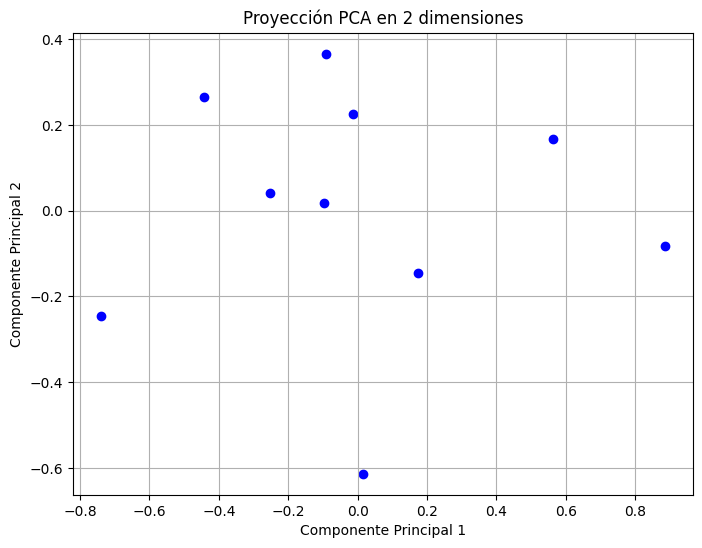

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
Implementación de PCA usando numpy.

Args:
X: np.array, Matriz de datos (n_samples, n_features).
n_components: int, Número de componentes principales a devolver.

Returns:
X_reduced: np.array, Los datos proyectados en los componentes principales.
"""
def pca(X, n_components):
    # 1. Estandarización de los datos
    X_meaned = X - np.mean(X, axis=0)

    # 2. Cálculo de la matriz de covarianza
    covariance_matrix = np.cov(X_meaned, rowvar=False)

    # 3. Obtención de autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # 4. Ordenamos los autovalores en orden descendente
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # 5. Seleccionamos los autovectores correspondientes a los n_components principales
    eigenvector_subset = sorted_eigenvectors[:, :n_components]

    # 6. Proyectamos los datos en los nuevos componentes principales
    X_reduced = np.dot(X_meaned, eigenvector_subset)

    return X_reduced, sorted_eigenvalues[:n_components]

# Ejemplo de uso:
# Generamos datos simulados (10 muestras, 5 características)
np.random.seed(42)          # Para reproducibilidad
X = np.random.rand(10, 5)   # 10 muestras, 5 variables (características)

# Aplicar PCA para reducir a 2 componentes
X_pca, explained_variance = pca(X, n_components=2)

print("Datos proyectados:", "\n", X_pca, "\n")
print("Varianza explicada por los componentes principales:", explained_variance, "\n")

# Graficar los datos proyectados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o')

# Etiquetas para los ejes
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección PCA en 2 dimensiones')

# Mostrar la gráfica
plt.grid(True)
plt.show()


Observamos cada punto del dataset graficado (los 10 ejemplos) en la proyección 2D

## PCA ejemplo usando sklearn

Utilizaremos PCA para graficar los embeddings de palabras en 2D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Creamos un pequeño corpus para entrenar Word2Vec
sentences = [
    ['dog', 'barks', 'loudly'],
    ['cat', 'meows', 'softly'],
    ['bird', 'chirps', 'happily'],
    ['dog', 'runs', 'quickly'],
    ['cat', 'jumps', 'quietly'],
    ['bird', 'flies', 'gracefully'],
    ['man', 'runs', 'fast'],
    ['woman', 'walks', 'quickly'],
    ['boy', 'jumps', 'high'],
    ['girl', 'laughs', 'softly']
]

# Entrenamos el modelo Word2Vec
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=4)

# Obtenemos los embeddings de palabras
words = list(model.wv.key_to_index)
word_vectors = np.array([model.wv[word] for word in words])

# Reducimos primero a 2 dimensiones con PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Visualizamos los embeddings proyectados en 2D
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1])

# Etiquetamos las palabras
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title('Visualización de Word Embeddings con PCA')
plt.show()

# t-SNE

El t-SNE es muy útil en procesamiento del lenguaje natural (NLP) para visualizar la relación entre embeddings de palabras, que no son más que representaciones vectoriales que capturan el significado de las palabras en un espacio de alta dimensionalidad.

Una de las aplicaciones comunes de t-SNE en NLP, es la visualización de word embeddings entrenados usando modelos como Word2Vec, GloVe, o embeddings derivados de modelos transformadores como BERT.

In [ ]:
!pip install gensim sklearn matplotlib

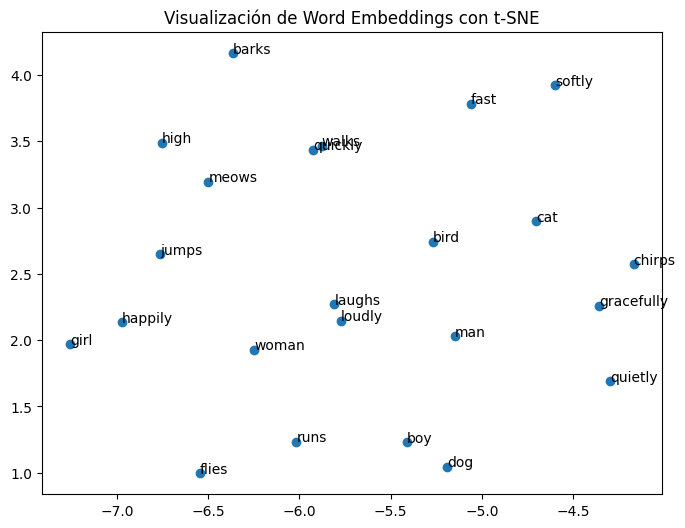

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Creamos un pequeño corpus para entrenar Word2Vec
sentences = [
    ['dog', 'barks', 'loudly'],
    ['cat', 'meows', 'softly'],
    ['bird', 'chirps', 'happily'],
    ['dog', 'runs', 'quickly'],
    ['cat', 'jumps', 'quietly'],
    ['bird', 'flies', 'gracefully'],
    ['man', 'runs', 'fast'],
    ['woman', 'walks', 'quickly'],
    ['boy', 'jumps', 'high'],
    ['girl', 'laughs', 'softly']
]

# Entrenamos el modelo Word2Vec
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=4)

# Obtenemos los embeddings de palabras
words = list(model.wv.key_to_index)
word_vectors = np.array([model.wv[word] for word in words])

# Reducimos primero a 20 dimensiones con PCA para facilitar el cálculo t-SNE
pca = PCA(n_components=20)
word_vectors_pca = pca.fit_transform(word_vectors)

# Aplicamos t-SNE para reducir a 2 dimensiones
# Set perplexity to be less than the number of samples
tsne = TSNE(n_components=2, random_state=42, perplexity=15)
word_embeddings_tsne = tsne.fit_transform(word_vectors_pca)

# Visualizamos los embeddings proyectados en 2D
plt.figure(figsize=(8, 6))
plt.scatter(word_embeddings_tsne[:, 0], word_embeddings_tsne[:, 1])

# Etiquetamos las palabras
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_embeddings_tsne[i, 0], word_embeddings_tsne[i, 1]))

plt.title('Visualización de Word Embeddings con t-SNE')
plt.show()

# UMAP

In [ ]:
!pip install umap-learn scikit-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


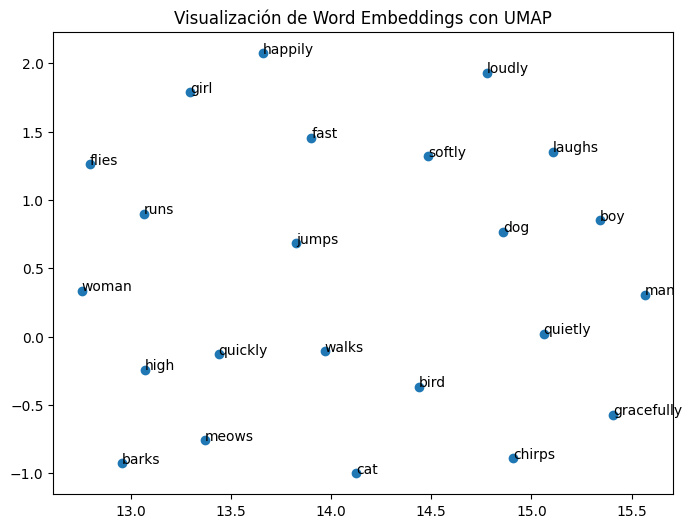

In [ ]:
# Aplicar UMAP para reducir la dimensionalidad a 2D
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embeddings_2d = umap_model.fit_transform(word_vectors_pca)

# Visualizamos los embeddings proyectados en 2D
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

# Etiquetamos las palabras
for i, word in enumerate(words):
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('Visualización de Word Embeddings con UMAP')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


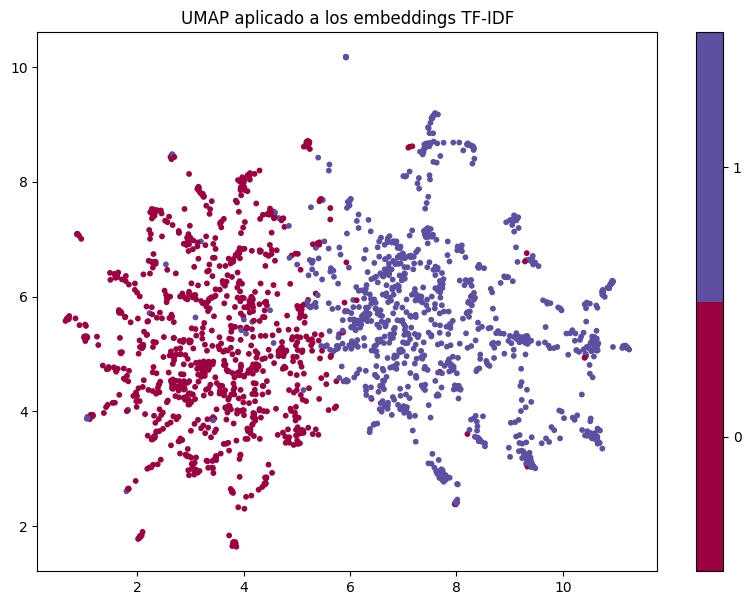

In [ ]:
import umap
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

# Cargar dataset de textos
newsgroups_data = fetch_20newsgroups(subset='all', categories=['sci.space', 'rec.sport.baseball'])
texts = newsgroups_data.data
labels = newsgroups_data.target

# Vectorización de los textos usando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Usamos un máximo de 1000 palabras para simplificar
tfidf_embeddings = vectorizer.fit_transform(texts)

# Aplicar UMAP para reducir la dimensionalidad a 2D
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embeddings_2d = umap_model.fit_transform(tfidf_embeddings.toarray())

# Visualización de los embeddings reducidos a 2D
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='Spectral', s=10)
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks([0, 1])
plt.title("UMAP aplicado a los embeddings TF-IDF")
plt.show()

# Aplicación al preprocesamiento de datos para un pipeline en machine learning



Ya hemos visto problemas de regresión y clasificación.

Ahora veremos el uso de reducción de dimensionalidad como técnica de preprocesamiento de datos.


Fuente:  
https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html